# Machine Learning - Assignment 8

Last assignment from Andrew Ng's Machine Learning Course in Python. This last one, is the most comprehensive one focusing on Anomaly Detection and Recomender Systems. Ex_7 problems were really tough, what a better way to end the course with a tougher problem!. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as op
from scipy.io import loadmat
from scipy.stats import multivariate_normal
import matplotlib.image as mpimg

## Problem 1: Anomaly Detection

We will implement an anomaly detection algorithm to detect anomalous behavior in server computers.

In [114]:
data = loadmat('./data/ex8data1.mat')
X = data["X"]
Xval, yval = data["Xval"], data['yval'].ravel()
print(X.shape)
print(Xval.shape, yval.shape)

(307, 2)
(307, 2) (307,)


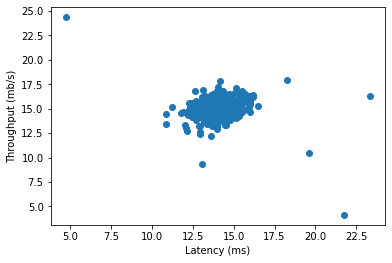

In [3]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.show()

### Estimating Gaussian Parameters

To calculate our probability density function, we first need to estimate our gaussian parameters.
$$µ_i=\frac{1}{m}∑^m_{j=1}x^j$$
$$\sigma^2_i=\frac{1}{m}∑^m_{j=1}(x^j-µ_i)^2$$

In [4]:
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

In [5]:
mu, sigma2 = estimateGaussian(X)
print('Mean =',mu)
print('Variance =',sigma2)

Mean = [14.11222578 14.99771051]
Variance = [1.83263141 1.70974533]


### Plotting Gaussian Distribution Bell-shaped curve 

In [132]:
def visualizeFit(distribution, X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = distribution.pdf(X_plot).reshape(xx.shape)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1])
    plt.contour(xx, yy, y_plot, levels=[1e-20, 1e-17, 1e-14, 1e-11, 1e-8, 1e-5, 1e-2])
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")
    plt.show()

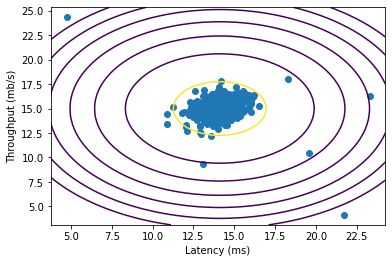

In [133]:
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))
visualizeFit(distribution, X)

### Selecting the threshold

In [119]:
def selectThreshold(yval, pval):
    F1_opt = 0
    epsilon_opt = 0
    for epsilon in np.linspace(min(pval)*1.01, max(pval), 1000):
        prediction = (pval < epsilon)
        tp = np.sum(np.multiply(prediction, yval))
        fp = np.sum(np.multiply(prediction, 1-yval))
        fn = np.sum(np.multiply(1-prediction, yval))
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        F1 = (2*precision*recall)/(precision+recall)
        if F1 > F1_opt:
            F1_opt = F1
            epsilon_opt = epsilon
    return epsilon_opt, F1_opt

In [123]:
pval = distribution.pdf(Xval)
epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: %.2e' % epsilon)
print('Best F1 on Cross Validation Set:  %f' % F1)

Best epsilon found using cross-validation: 9.00e-05
Best F1 on Cross Validation Set:  0.875000


In [143]:
def visualizeFitUP(distribution, X, outliers):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = distribution.pdf(X_plot).reshape(xx.shape)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1])
    plt.contour(xx, yy, y_plot, levels=[1e-20, 1e-17, 1e-14, 1e-11, 1e-8, 1e-5, 1e-2])
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")
    plt.scatter(X[outliers, 0], X[outliers, 1], s=100)
    plt.show()

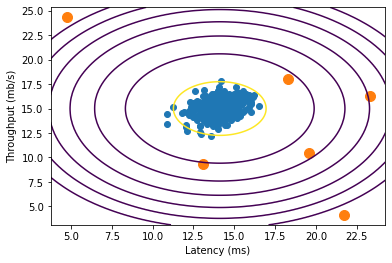

In [144]:
p = distribution.pdf(X)
outliers = p < epsilon
visualizeFitUP(distribution, X, outliers)